In [ ]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import pandas as pd
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Mounted at /content/drive


In [ ]:
data_fake = pd.read_csv('Fake.csv')
data_fake['fake'] = 1
data_fake = data_fake[['text', 'fake']] 
data_fake.head()

,text,fake
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [ ]:
data_true = pd.read_csv('True.csv')
data_true['fake'] = 0
data_true = data_true[['text', 'fake']]

In [ ]:
data = pd.concat([data_fake, data_true])
print(data_fake.shape)
print(data_true.shape)
print(data.shape)

(23481, 2)
(21417, 2)
(44898, 2)


In [ ]:
data.head()

,text,fake
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1


In [ ]:
data.reset_index(inplace=True, drop=True)

In [ ]:
# ps = PorterStemmer()
# corpus = []

# for i in range(len(data)):
#     if i%1000 == 0:
#         print(i)
#     review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
#     review = review.lower()
#     review = review.split()

#     review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
#     review = " ".join(review)
#     corpus.append(review)
# print(corpus)
# corpus[:5]

In [ ]:
# with open('portstemmerfile.txt', 'w') as f:
#   for a in corpus:
#     f.write('%s\n' %a)

In [ ]:
with open('portstemmerfile.txt', 'r') as f:
  corpus = f.readlines()

print(corpus[0])
print(len(corpus))

donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year great year america donald j trump realdonaldtrump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov alansandov decemb use word hater new year wish marlen marlen decemb say happi 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))


In [ ]:
X = cv.fit_transform(corpus)
X

<44898x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 6703450 stored elements in Compressed Sparse Row format>

In [ ]:
X = X.toarray()

In [ ]:
cv.get_feature_names()[:20]

['abadi',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abdullah',
 'abe',
 'abedin',
 'abid',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi']

In [ ]:
y = data['fake']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=333)

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())

In [ ]:
count_df.head()

,abadi,abandon,abba,abc,abc news,abdullah,abe,abedin,abid,abil,abl,abort,abroad,absenc,absolut,absurd,abu,abus,academ,academi,accept,access,accid,accommod,accompani,accomplish,accord,accord new,accord report,accord reuter,account,accur,accus,achiev,acknowledg,aclu,acquir,acr,across,across countri,...,www,www youtub,www youtub com,xi,xi jinp,yate,ye,yeah,year,year ago,year later,year old,year prison,year said,yell,yemen,yesterday,yet,yet anoth,yield,york,york citi,york reuter,york time,york time report,young,young peopl,younger,youth,youtu,youtub,youtub com,youtub com watch,zealand,zero,zika,zimbabw,zone,zor,zuma
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,18,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()


Accuracy : 0.961


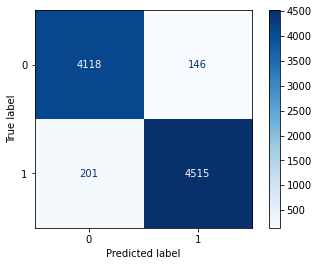

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy : %.3f" %score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues, normalize = None, labels=[0, 1], values_format='d')


Accuracy : 0.994


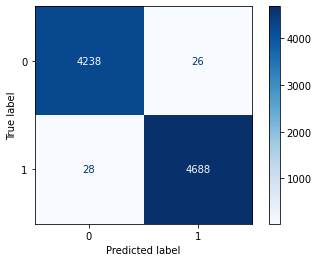

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy : %.3f" %score)
#cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(linear_clf, X_test, y_test, cmap=plt.cm.Blues, normalize = None, labels=[0, 1], values_format='d')

In [ ]:
# previous_score = 0
# for alpha in np.arange(0,1,0.1):
#   sub_classifier = MultinomialNB(alpha=alpha)
#   sub_classifier.fit(X_train, y_train)
#   pred = sub_classifier.predict(X_test)
#   score = metrics.accuracy_score(y_test, pred)
#   print("Alpha: %.1f , Accuracy: %f"%(alpha, score))
#   if score > previous_score:
#     classifier = sub_classifier

In [ ]:
print(len(y_train[y_train == 1]))
print(len(y_train[y_train == 0]))

18765
17153


In [ ]:
# %%time
# lemma = WordNetLemmatizer()
# corpus1 = []
# for i in range(len(data)):
#   if i %1000 == 0:
#     print(i)
#   text = re.sub('[^a-zA-Z]', ' ', data['text'][i])
#   text = text.lower()
#   text = text.split()

#   text = [lemma.lemmatize(word) for word in text if word not in stopwords.words('english')]
#   text = " ".join(text)
#   corpus1.append(text)
# corpus1[0]

In [ ]:
# with open('lemma.text','w') as f:
#   for row in corpus1:
#     f.write('%s\n'%row)

In [ ]:
with open('lemma.text','r') as f:
  corpus1 = f.readlines()

In [ ]:
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))

In [ ]:
X = cv.fit_transform(corpus1).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=333)

In [ ]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
  sub_classifier = MultinomialNB(alpha=alpha)
  sub_classifier.fit(X_train, y_train)
  pred = sub_classifier.predict(X_test)
  score = metrics.accuracy_score(y_test, pred)
  print("Alpha: %.1f , Accuracy: %f"%(alpha, score))
  if score > previous_score:
    classifier = sub_classifier

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0 , Accuracy: 0.965367
Alpha: 0.1 , Accuracy: 0.961693
Alpha: 0.2 , Accuracy: 0.961693
Alpha: 0.3 , Accuracy: 0.961470
Alpha: 0.4 , Accuracy: 0.961359
Alpha: 0.5 , Accuracy: 0.961136
Alpha: 0.6 , Accuracy: 0.961136
Alpha: 0.7 , Accuracy: 0.961024
Alpha: 0.8 , Accuracy: 0.961024
Alpha: 0.9 , Accuracy: 0.961024


Accuracy : 0.995


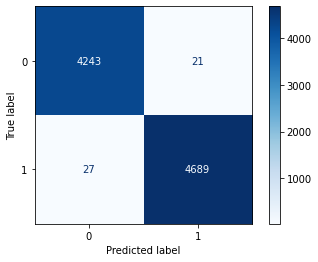

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy : %.3f" %score)
#cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(linear_clf, X_test, y_test, cmap=plt.cm.Blues, normalize = None, labels=[0, 1], values_format='d')

In [ ]:
y.loc[y==1]

0        1
1        1
2        1
3        1
4        1
        ..
23476    1
23477    1
23478    1
23479    1
23480    1
Name: fake, Length: 23481, dtype: int64

Accuracy : 0.998


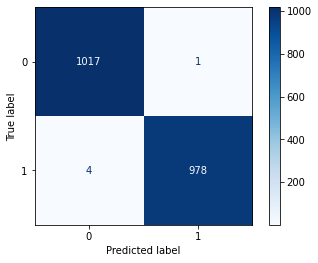

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
cv = TfidfVectorizer()


X_minority, y_minority = [corpus[i] for i in range(len(corpus)) if y[i] == 1], [a for a in y if a == 1]
X_majority, y_majority = [corpus[i] for i in range(len(corpus)) if y[i] == 0], [a for a in y if a == 0]
X_minority = X_minority[:5000]
X_majority = X_majority[:5000]
y_minority = y_minority[:5000]
y_majority = y_majority[:5000]
X_balanced = X_majority + X_minority
y_balanced = y_majority + y_minority
X_balanced = cv.fit_transform(X_balanced).toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=333)

linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy : %.3f" %score)
#cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(linear_clf, X_test, y_test, cmap=plt.cm.Blues, normalize = None, labels=[0, 1], values_format='d')


In [ ]:
cv = TfidfVectorizer()

X_minority, y_minority = [corpus1[i] for i in range(len(corpus1)) if y[i] == 1], [a for a in y if a == 1]
X_majority, y_majority = [corpus1[i] for i in range(len(corpus1)) if y[i] == 0], [a for a in y if a == 0]
X_minority = X_minority[:5000]
X_majority = X_majority[:5000]
y_minority = y_minority[:5000]
y_majority = y_majority[:5000]
X_balanced = X_majority + X_minority
y_balanced = y_majority + y_minority
X_balanced = cv.fit_transform(X_balanced).toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_balanced,y_balanced,test_size=0.2, random_state=333)

linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy : %.3f" %score)
#cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(linear_clf, X_test, y_test, cmap=plt.cm.Blues, normalize = None, labels=[0, 1], values_format='d')